In [1]:
from utils import *
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import glob
from joblib import Parallel, delayed

In [2]:
def load_sensitivity(transform):
    files = glob.glob(f'sensitivity/*__*__{transform}*__*.csv')
    print(f'Loaded {len(files)} files')
    dfs = Parallel(n_jobs=-1)(delayed(lambda file: pd.read_csv(file, index_col=False))(file=file) for file in files)
    df = pd.concat(dfs)
    df['level'] = df['transform'].apply(lambda x: float(x.split(';')[1]))
    df['transform_type'] = df['transform'].apply(lambda x: x.split(';')[0])
    return df
    
transform_name = 'WhiteNoise'
#transform_name = 'Spike'
df = load_sensitivity(transform_name)
df

Loaded 10940 files


dataset    method           transform  seed  accuracy  \
0               TwoLeadECG       cnn      WhiteNoise;1.0     6  0.588235   
0                     Crop    rocket      WhiteNoise;0.5     1  0.240536   
0                  Symbols  tsforest      WhiteNoise;1.0     2  0.357789   
0   SmallKitchenAppliances    rocket      WhiteNoise;0.1     1  0.333333   
0                  Symbols   catch22      WhiteNoise;0.1     4  0.460302   
..                     ...       ...                 ...   ...       ...   
0                  Herring   catch22      WhiteNoise;0.5     2  0.593750   
0                      Ham       cnn   WhiteNoise;0.0001     7  0.666667   
0    ChlorineConcentration    rocket  WhiteNoise;0.00001     8  0.671615   
0               TwoLeadECG       cnn   WhiteNoise;0.0001     7  0.954346   
0                      Ham       cnn    WhiteNoise;0.001     2  0.695238   

      level transform_type  
0   1.00000     WhiteNoise  
0   0.50000     WhiteNoise  
0   1.00000     WhiteNoise  
0   0.10000     WhiteNoise  
0   0.10000     WhiteNoise  
..      ...            ...  
0   0.50000     WhiteNoise  
0   0.00010     WhiteNoise  
0   0.00001     WhiteNoise  
0   0.00010     WhiteNoise  
0   0.00100     WhiteNoise  

[10940 rows x 7 columns]

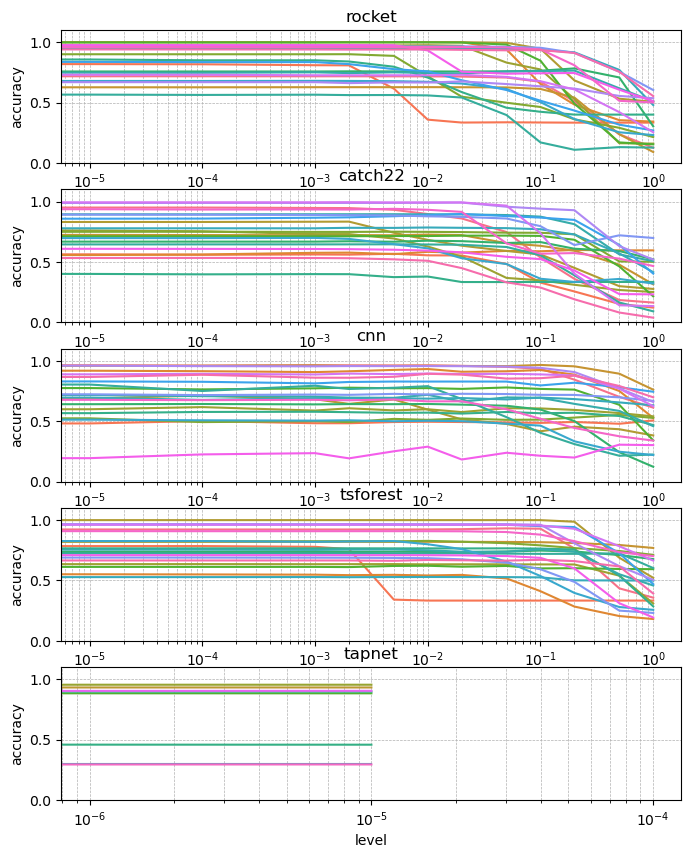

In [3]:
fig, axes = plt.subplots(5, 1, figsize=(8, 10))
sns.lineplot(data=df.query('method=="rocket"'), x='level', y='accuracy', hue='dataset', ax=axes[0], errorbar=None)
axes[0].set_xscale('log')
axes[0].set_title('rocket')
axes[0].get_legend().remove()

sns.lineplot(data=df.query('method=="catch22"'), x='level', y='accuracy', hue='dataset', ax=axes[1], errorbar=None)
axes[1].set_xscale('log')
axes[1].set_title('catch22')
axes[1].get_legend().remove()

sns.lineplot(data=df.query('method=="cnn"'), x='level', y='accuracy', hue='dataset', ax=axes[2], errorbar=None)
axes[2].set_xscale('log')
axes[2].set_title('cnn')
axes[2].get_legend().remove()

sns.lineplot(data=df.query('method=="tsforest"'), x='level', y='accuracy', hue='dataset', ax=axes[3], errorbar=None)
axes[3].set_xscale('log')
axes[3].set_title('tsforest')
axes[3].get_legend().remove()

sns.lineplot(data=df.query('method=="tapnet"'), x='level', y='accuracy', hue='dataset', ax=axes[4], errorbar=None)
axes[4].set_xscale('log')
axes[4].set_title('tapnet')
axes[4].get_legend().remove()

for ax in axes:
    ax.set_ylim(0, 1.1)
    ax.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.savefig(f'figures/{transform_name}_cas.pdf', bbox_inches='tight', pad_inches=0)

In [4]:
#sns.lineplot(data=df.query('method=="rocket"'), x='level', y='accuracy', hue='dataset')
#plt.xscale('log')

In [5]:
#sns.lineplot(data=df.query('method=="catch22"'), x='level', y='accuracy', hue='dataset')
#plt.xscale('log')

In [6]:
#sns.lineplot(data=df.query('method=="tsforest"'), x='level', y='accuracy', hue='dataset')
#plt.xscale('log')

In [7]:
#sns.lineplot(data=df.query('method=="cnn"'), x='level', y='accuracy', hue='dataset')
#plt.xscale('log')

In [8]:


#hc = HIVECOTEV2(n_jobs=-1)

In [9]:
#fhgfgh=dfgdg

In [10]:
df

dataset    method           transform  seed  accuracy  \
0               TwoLeadECG       cnn      WhiteNoise;1.0     6  0.588235   
0                     Crop    rocket      WhiteNoise;0.5     1  0.240536   
0                  Symbols  tsforest      WhiteNoise;1.0     2  0.357789   
0   SmallKitchenAppliances    rocket      WhiteNoise;0.1     1  0.333333   
0                  Symbols   catch22      WhiteNoise;0.1     4  0.460302   
..                     ...       ...                 ...   ...       ...   
0                  Herring   catch22      WhiteNoise;0.5     2  0.593750   
0                      Ham       cnn   WhiteNoise;0.0001     7  0.666667   
0    ChlorineConcentration    rocket  WhiteNoise;0.00001     8  0.671615   
0               TwoLeadECG       cnn   WhiteNoise;0.0001     7  0.954346   
0                      Ham       cnn    WhiteNoise;0.001     2  0.695238   

      level transform_type  
0   1.00000     WhiteNoise  
0   0.50000     WhiteNoise  
0   1.00000     WhiteNoise  
0   0.10000     WhiteNoise  
0   0.10000     WhiteNoise  
..      ...            ...  
0   0.50000     WhiteNoise  
0   0.00010     WhiteNoise  
0   0.00001     WhiteNoise  
0   0.00010     WhiteNoise  
0   0.00100     WhiteNoise  

[10940 rows x 7 columns]

In [11]:
def get_ranks(df, reps =30):
    algo_ranks = {x: 0 for x in df.method.unique()}
    for _ in range(reps):
        pdf = df.sample(frac=1).reset_index(drop=True)
        l = pdf.drop_duplicates(subset='method', keep='first').sort_values('accuracy', ascending=False)
        for i, (_, row) in enumerate(l.iterrows()):
            algo_ranks[row['method']] += (i+1)/reps
    return algo_ranks

def get_all_ranks(df):
    new_df = {'dataset': [], 'transform': [], 'method': [], 'rank': []}
    for dataset in df.dataset.unique():
        for transform in df['transform'].unique():
            subset = df.query(f'dataset=="{dataset}" and transform=="{transform}"').sample(frac=1).reset_index(drop=True)
            ranks = get_ranks(subset)
            #print(dataset, transform, ranks)
            for k, v in ranks.items():
                new_df['dataset'].append(dataset)
                new_df['transform'].append(transform)
                new_df['method'].append(k)
                new_df['rank'].append(v)
    return pd.DataFrame(new_df)

df_ranks = get_all_ranks(df)
df_ranks['level'] = df_ranks['transform'].apply(lambda x: float(x.split(';')[1]))
df_ranks

dataset         transform    method      rank  level
0            TwoLeadECG    WhiteNoise;1.0       cnn  1.300000  1.000
1            TwoLeadECG    WhiteNoise;1.0   catch22  3.566667  1.000
2            TwoLeadECG    WhiteNoise;1.0    rocket  3.433333  1.000
3            TwoLeadECG    WhiteNoise;1.0  tsforest  1.700000  1.000
4            TwoLeadECG    WhiteNoise;0.5       cnn  1.533333  0.500
...                 ...               ...       ...       ...    ...
1107  FreezerSmallTrain  WhiteNoise;0.001   catch22  2.966667  0.001
1108  FreezerSmallTrain   WhiteNoise;0.01       cnn  4.000000  0.010
1109  FreezerSmallTrain   WhiteNoise;0.01  tsforest  1.866667  0.010
1110  FreezerSmallTrain   WhiteNoise;0.01    rocket  1.200000  0.010
1111  FreezerSmallTrain   WhiteNoise;0.01   catch22  2.933333  0.010

[1112 rows x 5 columns]

catch22
cnn
rocket
tsforest
catch22
cnn
rocket
tsforest


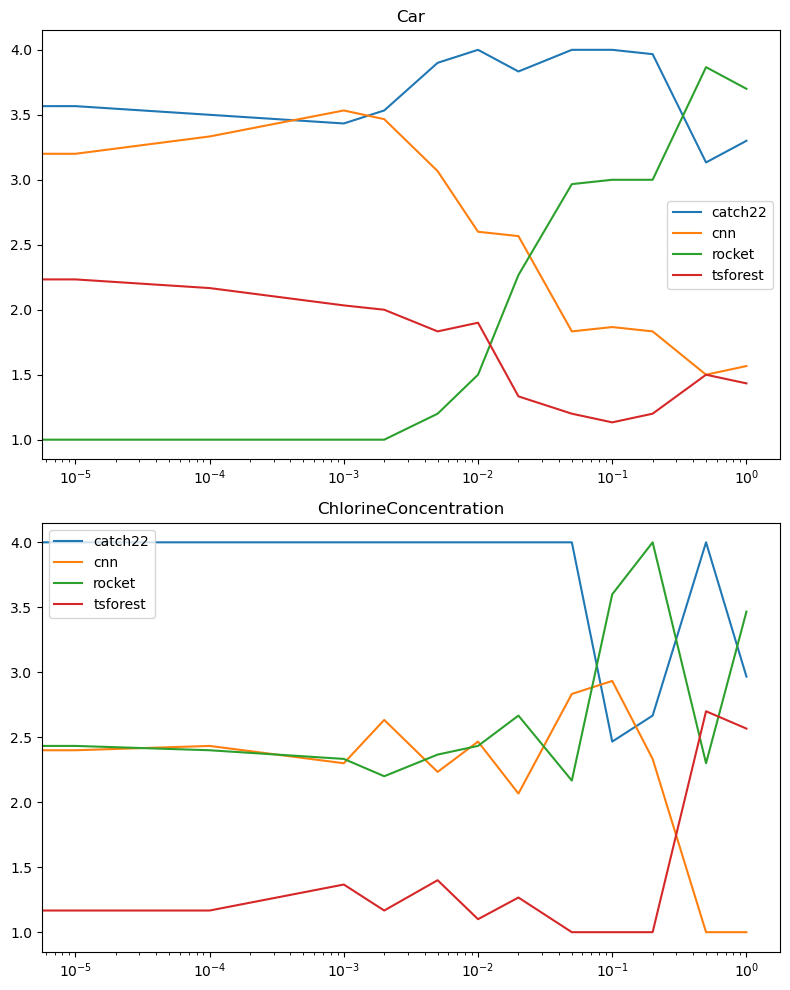

In [12]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(8, 10))  # Adjust figsize as needed

# For the "Car" dataset
sub = df_ranks.query('dataset=="Car"')
for method in sorted(sub['method'].unique()):
    print(method)
    h = sub.query(f'method=="{method}"').sort_values('level')
    axes[0].plot(h['level'], h['rank'], label=method)
axes[0].legend()
axes[0].set_xscale('log')
axes[0].set_title('Car')  # Optional title

# For the "ChlorineConcentration" dataset
sub = df_ranks.query('dataset=="ChlorineConcentration"')
for method in sorted(sub['method'].unique()):
    print(method)
    h = sub.query(f'method=="{method}"').sort_values('level')
    axes[1].plot(h['level'], h['rank'], label=method)
axes[1].legend()
axes[1].set_xscale('log')
axes[1].set_title('ChlorineConcentration')  # Optional title

plt.tight_layout()
plt.show()

/tmp/ipykernel_686/2950722885.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sub = df_ranks.groupby(['method', 'transform']).mean().reset_index()


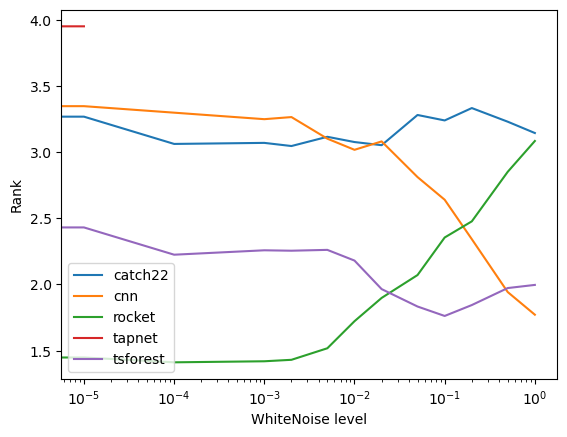

In [13]:
sub = df_ranks.groupby(['method', 'transform']).mean().reset_index()
for method in sub['method'].unique():
    h = sub.query(f'method=="{method}"').sort_values('level')
    plt.plot(h['level'], h['rank'], label=method)
plt.legend()
plt.xlabel(f'{transform_name} level')
plt.ylabel('Rank')
plt.xscale('log')
plt.savefig(f'figures/{transform_name}_rank.pdf', bbox_inches='tight', pad_inches=0)